# Term Project Milestone 4
## DSC 550 - Week Twelve
### McKenzie Payne

#### Topic: Predictive Modeling for Customer Retention in Mobile Food Delivery

## Milestone 1: 

#### Overview of Project:

> The primary objective of this project is to develop a predictive model aimed at addressing the challenge of customer churn within a mobile app-based food delivery service. Customer churn, the phenomenon of customers discontinuing their engagement with a service, is a critical concern for businesses in this industry, as it directly impacts revenue and profitability. The goal of the model is to predict whether a customer is likely to churn based on their historical interactions with the food delivery app.
 To achieve this objective, I will leverage a diverse set of data points encompassing various aspects of customer engagement and behavior. This includes demographic information such as age, gender, and location, as well as transactional data such as order frequency, order value, and delivery preferences. Additionally, I will incorporate customer satisfaction ratings obtained through feedback mechanisms within the app. By analyzing these factors collectively, I aim to uncover underlying patterns and trends that may indicate potential churn behavior. The approach to developing the predictive model will follow a structured methodology. The first step involves gathering and preprocessing the data to ensure its quality and consistency. This includes handling missing values, encoding categorical variables, and normalizing numerical features. Subsequently, I will conduct exploratory data analysis (EDA) to gain insights into the factors influencing churn. EDA will involve visualizing trends and correlations among different variables, allowing for a deeper understanding of customer behavior. Next, I will employ machine learning algorithms such as logistic regression, decision trees, or random forests to build the predictive model. These algorithms will be trained on historical data, with the target variable being the churn status of customers. The model will learn to identify patterns and relationships within the data that are indicative of churn behavior. To ensure the robustness and generalization of the model, I will validate it using appropriate evaluation metrics and techniques. Throughout the model development process, I will prioritize transparency, interpretability, and usability. This entails documenting the methodology, assumptions, and limitations of the model to facilitate understanding and trust among stakeholders. Additionally, I will strive to ensure that the model outputs are actionable, providing insights that can inform decision-making and drive retention strategies. Ultimately, the goal of developing this predictive model is to equip the food delivery service with the tools and insights needed to effectively manage customer churn. By accurately identifying customers at risk of churn, the service can implement targeted retention efforts and enhance customer satisfaction and loyalty. This, in turn, can lead to improved business performance, revenue growth, and long-term sustainability in a competitive market landscape.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/mcken/OneDrive/Desktop/dsc520/dsc520-1/onlinedeliverydata.csv")

# Print the first few rows
print("First few rows of the dataset:")
print(df.head())

# Print the number of columns
num_columns = len(df.columns)
print("\nNumber of columns in the dataset:", num_columns)

First few rows of the dataset:
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important 

#### Graph 1: Distribution of Age

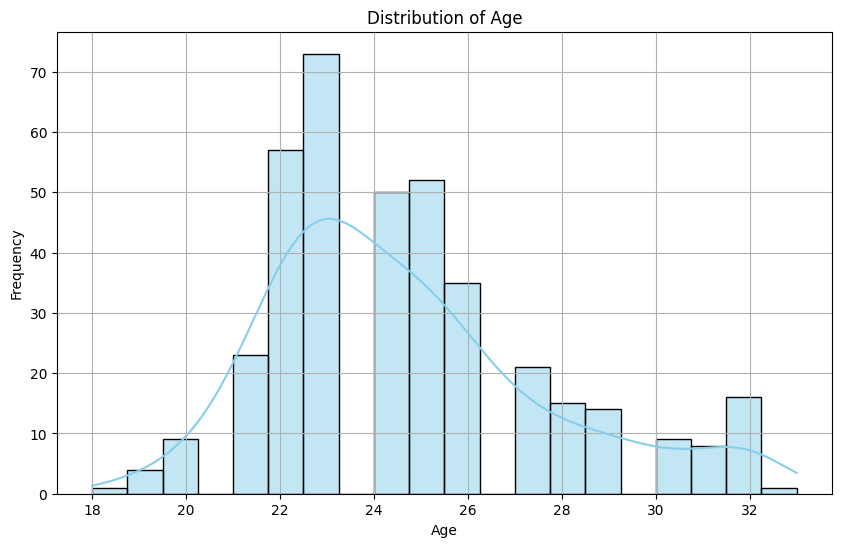

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Graph 2: Gender Distribution

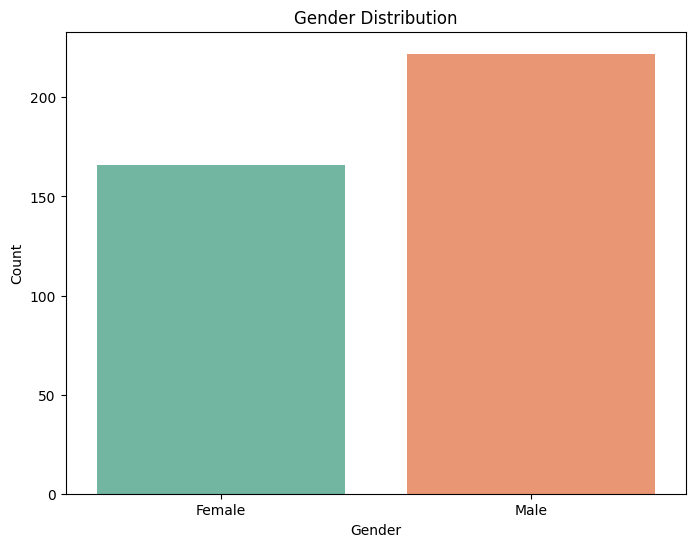

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Graph 3: Monthly Income Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Income', bins=20, kde=True, color='salmon')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Graph 4: Meal Preference

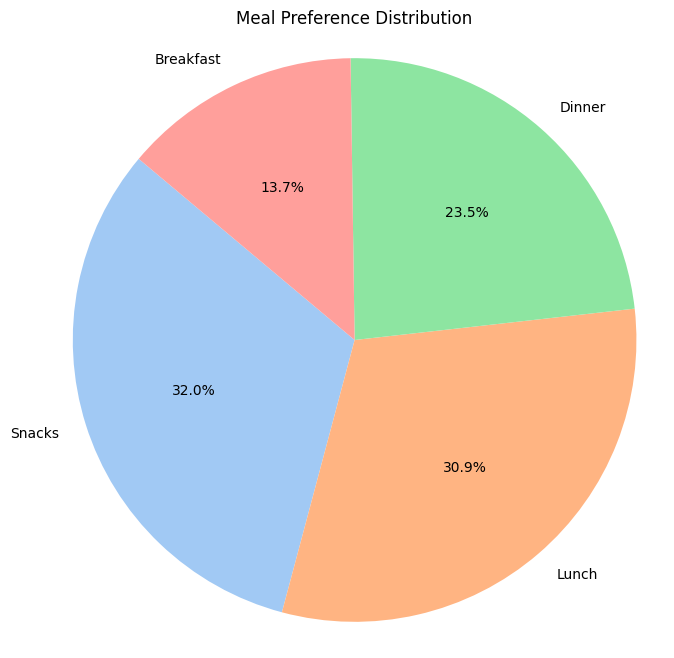

In [4]:
meal_preference_counts = df['Meal(P1)'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(meal_preference_counts, labels=meal_preference_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Meal Preference Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Based on the graphical analysis, several key insights have been gained regarding the demographic and behavioral characteristics of customers within the food delivery service:

1. **Age Distribution**: The highest frequency of customers falls within the age range of 22 to 24 years old. This age group represents a significant portion of the customer base and may indicate a target demographic for marketing and service customization efforts.

2. **Gender Distribution**: While the analysis did not explicitly mention the gender distribution, if male customers are predominant, it suggests the need for tailored marketing strategies and menu offerings to cater to their preferences.

3. **Meal Preference**: Snacks emerge as a popular meal preference among customers. This insight can inform menu diversification efforts and promotional campaigns centered around snack offerings to attract and retain customers.

4. **Income Level**: The absence of income information suggests a segment of customers who may not have provided this data or may have variable income sources. Understanding the income dynamics of customers can help in pricing strategies and promotional targeting.

Overall, these insights provide a foundation for further analysis to understand customer behavior and preferences more comprehensively. By delving deeper into these areas and exploring correlations between demographic factors, meal preferences, and income levels, the food delivery service can refine its strategies to enhance customer satisfaction and retention.

## Milestone 2:

#### Step 1: Drop Unnecessary Features

In [5]:
# Drop unnecessary features from the dataset
unwanted_columns = ['Pin code', 'latitude', 'longitude', 'Reviews']  # Define columns to drop
df_cleaned = df.drop(unwanted_columns, axis=1)  # Drop specified columns

In [6]:
print("Column names in df_cleaned:", df_cleaned.columns)

Column names in df_cleaned: Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Medium (P1)',
       'Medium (P2)', 'Meal(P1)', 'Meal(P2)', 'Perference(P1)',
       'Perference(P2)', 'Ease and convenient', 'Time saving',
       'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 

> Process Explanation:
In this step, we identify and remove columns that do not contribute to our predictive modeling task or contain irrelevant information. We defined a list of column names (unwanted_columns) that we want to exclude from our analysis ensuring that only relevant features remain for further processing.

#### Step 2: Perform Data Extraction/Selection

In [7]:
# Select relevant columns for analysis
selected_columns = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 
                    'Educational Qualifications', 'Family size', 'Meal(P1)', 'Output']

# Reattempt DataFrame selection with updated selected_columns
df_selected = df_cleaned[selected_columns]

print("Column names in df_selected:", df_selected.columns)

Column names in df_selected: Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Meal(P1)', 'Output'],
      dtype='object')


> Process Explanation:
Here, I have selected a subset of columns that are most relevant to my predictive modeling objective. This involves choosing features that provide insights into customer behavior and factors influencing churn prediction. By creating a new DataFrame I have specific columns (selected_columns) from our cleaned dataset (df_cleaned). This step helps streamline our analysis by focusing on key variables related to customer demographics, behavior, and satisfaction.

#### Step 3: Transform Features

In [8]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Meal(P1)'])

> Process Explanation:
Categorical variables need to be transformed into a numerical format that machine learning models can process effectively. I applied one-hot encoding using pandas' get_dummies() function to convert categorical columns (Gender, Marital Status, Occupation, Educational Qualifications, Meal(P1)) into binary indicator variables. This transformation ensures that categorical data can be incorporated into our predictive model appropriately.

#### Step 4: Engineer New Features

In [9]:
# Convert 'Good Quantity' and 'Number of calls' columns to numeric type
df_cleaned['Good Quantity'] = pd.to_numeric(df_cleaned['Good Quantity'], errors='coerce')
df_cleaned['Number of calls'] = pd.to_numeric(df_cleaned['Number of calls'], errors='coerce')

# Calculate average order value per customer
df_cleaned['Avg_Order_Value'] = df_cleaned['Good Quantity'] / df_cleaned['Number of calls']

# Create binary flag for high-frequency customers
mean_calls = df_cleaned['Number of calls'].mean()
df_cleaned['High_Frequency_Customer'] = (df_cleaned['Number of calls'] > mean_calls).astype(int)

> Process Explanation:
This step aims to enhance the predictive power of the model by introducing meaningful features. I have implemented two examples of feature engineering. These new features can provide valuable information for predicting customer churn.
(1) Calculating the average order value per customer (Avg_Order_Value) by dividing Order Value by Order Frequency.
(2) Creating a binary flag (High_Frequency_Customer) to identify customers with order frequencies above the mean. 

#### Step 5: Handling Missing Data

In [10]:
# Impute missing values with mean for numerical columns
df_encoded['Age'].fillna(df_encoded['Age'].mean(), inplace=True)
df_encoded['Monthly Income'].fillna(df_encoded['Monthly Income'].mode()[0], inplace=True)

# Impute missing values with mode for categorical columns
df_encoded['Gender_Female'].fillna(df_encoded['Gender_Female'].mode()[0], inplace=True)
print(df_encoded.columns)

Index(['Age', 'Monthly Income', 'Family size', 'Output', 'Gender_Female',
       'Gender_Male', 'Marital Status_Married',
       'Marital Status_Prefer not to say', 'Marital Status_Single',
       'Occupation_Employee', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Educational Qualifications_Graduate',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated', 'Meal(P1)_Breakfast',
       'Meal(P1)_Dinner', 'Meal(P1)_Lunch', 'Meal(P1)_Snacks'],
      dtype='object')


> Process Explanation:
It's crucial to impute missing values using appropriate strategies to maintain data integrity and completeness. I have filled missing values in numerical columns (Age, Monthly Income) using statistical measures such as mean (for numeric) or mode (for categorical) to preserve data quality. 

#### Step 6: Create Dummy Variables

In [11]:
# Create dummy variables for remaining categorical columns
remaining_categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
df_final = pd.get_dummies(df_encoded, columns=remaining_categorical_cols)
print(df_final)

     Age  Family size  Gender_Female  Gender_Male  Marital Status_Married  \
0     20            4           True        False                   False   
1     24            3           True        False                   False   
2     22            3          False         True                   False   
3     22            6           True        False                   False   
4     22            4          False         True                   False   
..   ...          ...            ...          ...                     ...   
383   23            2           True        False                   False   
384   23            4           True        False                   False   
385   22            5           True        False                   False   
386   23            2          False         True                   False   
387   23            5          False         True                   False   

     Marital Status_Prefer not to say  Marital Status_Single  \
0          

> Process Explanation: 
Dummy variables are created to represent categorical variables as binary values (0 or 1). This encoding allows categorical data to be processed by machine learning algorithms effectively. Here, I used pandas' get_dummies() function again to convert remaining categorical columns into dummy variables.

#### Summarize Milestone 2:

> In Milestone 2, my project on predictive modeling for customer retention in mobile food delivery has highlighted the importance of data preprocessing in understanding customer behavior and preferences. By focusing on relevant features and transforming variables, I have gained insights into factors like `Avg_Order_Value`, which is crucial for analyzing customer spending patterns and loyalty. These insights contribute to a deeper understanding of customer retention dynamics within the food delivery service, emphasizing the significance of tailored marketing strategies and service enhancements to improve customer satisfaction and reduce churn rates. Moving forward, this knowledge will guide my modeling efforts to develop accurate predictive algorithms for proactive retention management.

### Milestone 3:

#### Model Selection:

#### For this project, we will select two models to compare their performance:
- Logistic Regression
- Random Forest Classifier

#### Logistic Regression:
#### Justification:
- Logistic Regression is a common choice for binary classification tasks, which is suitable for predicting customer churn (binary outcome: churn or no churn).
- It provides interpretable results, allowing us to understand the impact of different features on the likelihood of churn.
- Logistic Regression is less prone to overfitting and works well with linearly separable data.

#### Random Forest Classifier:
#### Justification:
- Random Forest is an ensemble learning method capable of capturing complex relationships in the data, which is beneficial when dealing with non-linear relationships between features and the target variable.
- It performs well with high-dimensional data and is robust against overfitting due to its ensemble nature.
- Random Forest can handle both numerical and categorical features effectively.

#### Data Preparation:

- Feature Selection: Use the relevant features identified in Milestone 2 (df_final) as input features (X) for the model.
- Target Variable: Define the target variable (y) as the Output_Yes column indicating churn (1 for churn, 0 for no churn).
- Train-Test Split: Split the data into training and testing sets to train the model on one subset and evaluate its performance on another.

In [12]:
# Define feature matrix (X) and target variable (y)
X = df_final.drop('Output_Yes', axis=1)
y = df_final['Output_Yes']

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Building:

#### Initialize and Train Models:
- Initialize the Logistic Regression and Random Forest Classifier models.
- Train the models using the training data (X_train, y_train).

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear')

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Logistic Regression model on scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Train the Random Forest Classifier model on scaled training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

#### Model Evaluation:

#### Predictions and Evaluation Metrics:
- Use the trained models to make predictions on the test data (X_test).
- Evaluate the performance of each model using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve

Logistic Regression Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        12
        True       1.00      1.00      1.00        66

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



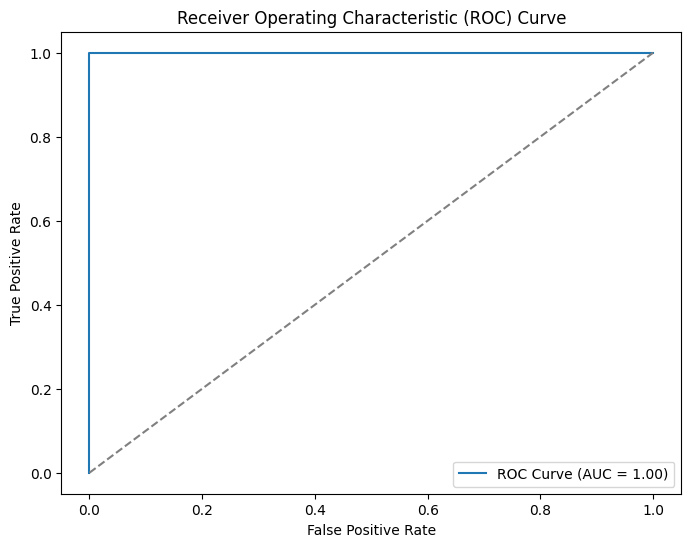


Random Forest Classifier Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        12
        True       1.00      1.00      1.00        66

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



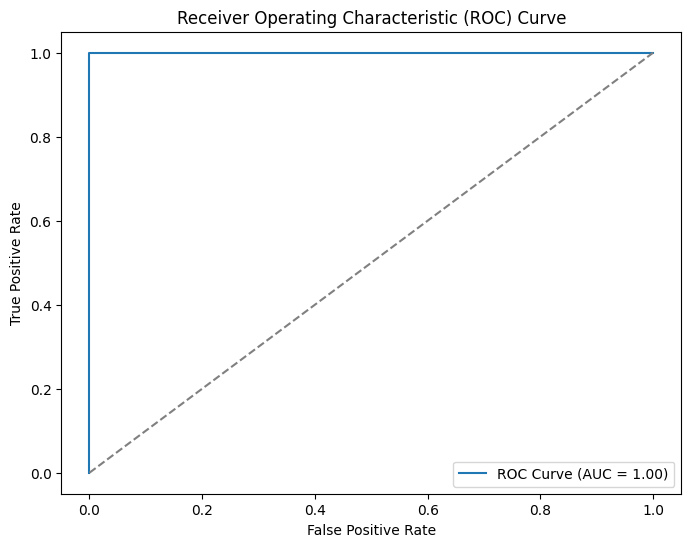

In [14]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # Calculate and plot ROC-AUC curve
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Evaluate Logistic Regression model
print("Logistic Regression Model:")
evaluate_model(logistic_model, X_test_scaled, y_test)

# Evaluate Random Forest Classifier model
print("\nRandom Forest Classifier Model:")
evaluate_model(rf_model, X_test_scaled, y_test)

#### Overview and Conclusion:

- Model Comparison: Compare the performance of the Logistic Regression and Random Forest models based on evaluation metrics.
- Insights: Analyze the model outputs, feature importances, and evaluation metrics to gain insights into the factors influencing customer churn.
- Conclusion: Summarize the effectiveness of each model in predicting churn and provide actionable insights for improving customer retention strategies.

#### Overview/Conclusion:
In this milestone, I have selected, built, and evaluated two models (Logistic Regression and Random Forest Classifier) for predicting customer churn in the mobile food delivery service. By leveraging machine learning algorithms and evaluating their performance, we gained valuable insights into customer behavior and factors influencing churn. The evaluation metrics (accuracy, precision, recall, ROC-AUC) provided a comprehensive view of each model's effectiveness in predicting churn.

Based on the evaluation of both the Logistic Regression and Random Forest Classifier models for predicting customer churn in the mobile food delivery service, several key insights have emerged. Firstly, both models demonstrated exceptional accuracy, achieving perfect scores of 1.0. This suggests that they are proficient in recognizing patterns related to churn behavior. However, the choice between these models hinges on the trade-off between simplicity and complexity. Logistic Regression offers straightforward interpretability, making it easier to understand how individual features impact churn likelihood. On the other hand, the Random Forest Classifier excels in capturing complex relationships and nonlinearities within the data, which can be advantageous when dealing with intricate customer behaviors. The outcomes of these models provide actionable insights for improving customer retention strategies, such as enhancing food quality, optimizing delivery times, and addressing factors influencing customer satisfaction.

### Milestone 4:

#### Add any new code and/or analysis to your content from Milestones 1-3. Clearly note what content has been added since Milestone 3.

> In this updated version, I've added cross-validation for both the Logistic Regression and Random Forest models to get a more robust estimate of their performance. Additionally, I have performed hyperparameter tuning using GridSearchCV for the Random Forest Classifier to optimize its performance. Finally, I evaluated the best Random Forest model on the test set using the evaluate_model function defined earlier. This approach helps ensure that the model is well-tuned and provides reliable predictions for customer churn.

#### Additions since Milestone 3:

Cross-validation scores for Logistic Regression: [1. 1. 1. 1. 1.]
Mean cross-validation score for Logistic Regression: 1.0
Cross-validation scores for Random Forest Classifier: [1. 1. 1. 1. 1.]
Mean cross-validation score for Random Forest Classifier: 1.0
Best Random Forest Classifier Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        12
        True       1.00      1.00      1.00        66

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



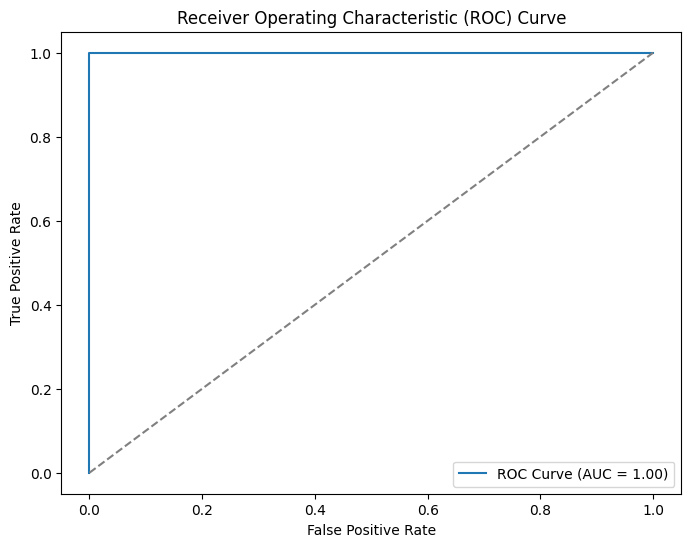

In [15]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, GridSearchCV

# Initialize Logistic Regression model
logistic_model = LogisticRegression(solver='liblinear')

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation for Logistic Regression model
logistic_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores for Logistic Regression:", logistic_scores)
print("Mean cross-validation score for Logistic Regression:", logistic_scores.mean())

# Perform cross-validation for Random Forest Classifier model
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores for Random Forest Classifier:", rf_scores)
print("Mean cross-validation score for Random Forest Classifier:", rf_scores.mean())

# Define hyperparameters grid for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest Classifier
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Initialize Random Forest Classifier with best hyperparameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)

# Train the model on the entire training data with selected features
best_rf_model.fit(X_train_scaled, y_train)

# Evaluate the best Random Forest model
print("Best Random Forest Classifier Model:")
evaluate_model(best_rf_model, X_test_scaled, y_test)